In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from datetime import date

%matplotlib inline
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [20]:
df_train = pd.read_csv("df_train.csv")

In [21]:
df_train.set_index(keys = "CustomerID", inplace = True)

In [22]:
df_train.head()

,Income,Kid_Younger6,Children_6to18,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Gender,has_Kids,Age,daysAsCardClient,Graduation,HighSchool,Master,PhD,Married,Single,Widow,Mnt_pday_card
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14594,113947.0,0,0,43.0,4640.0,3380,5700.0,2240.0,562.0,154.0,2,10,7,7,4,0,0,1,0,0,0,0,0,42,815,1,0,0,0,0,1,0,20.461350
19070,114297.0,0,0,74.0,7080.0,3680,7620.0,1840.0,1220.0,46.0,1,5,9,12,2,0,0,0,0,0,0,0,0,49,724,1,0,0,0,1,0,0,29.676796
29888,115476.0,0,0,85.0,4130.0,380,4890.0,3640.0,380.0,28.0,1,5,5,7,1,0,0,0,0,0,0,1,0,63,447,0,0,0,1,1,0,0,30.085011
12221,101172.0,1,1,25.0,3590.0,0,1770.0,80.0,180.0,14.0,5,8,3,8,5,0,0,0,0,0,0,1,1,43,539,1,0,0,0,1,0,0,10.452690
21107,123128.0,0,0,64.0,5390.0,1126,9495.0,656.0,562.0,74.0,0,4,7,8,5,0,1,0,1,0,0,1,0,52,844,0,1,0,0,0,1,0,20.501185


### Customer Value Prespective

In [23]:
df_train.columns

Index(['Income', 'Kid_Younger6', 'Children_6to18', 'Recency', 'MntMeat&Fish',
       'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth',
       'Complain', 'Response_Cmp1', 'Response_Cmp2', 'Response_Cmp3',
       'Response_Cmp4', 'Response_Cmp5', 'Gender', 'has_Kids', 'Age',
       'daysAsCardClient', 'Graduation', 'HighSchool', 'Master', 'PhD',
       'Married', 'Single', 'Widow', 'Mnt_pday_card'],
      dtype='object')

In [24]:
#using only Monetary variables for the customer value prespective
df_value = df_train[['MntMeat&Fish','MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts', 'MntAdditionalRequests','Mnt_pday_card']].copy()


In [25]:
df_value.head(3)

,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,Mnt_pday_card
CustomerID,,,,,,,
14594,4640.0,3380,5700.0,2240.0,562.0,154.0,20.461350
19070,7080.0,3680,7620.0,1840.0,1220.0,46.0,29.676796
29888,4130.0,380,4890.0,3640.0,380.0,28.0,30.085011


In [33]:
ks = range(1,11)
inertias = []

for k in ks:
    model = sk.cluster.KMeans(n_clusters = k).fit(df_value)
    inertias.append(model.inertia_)

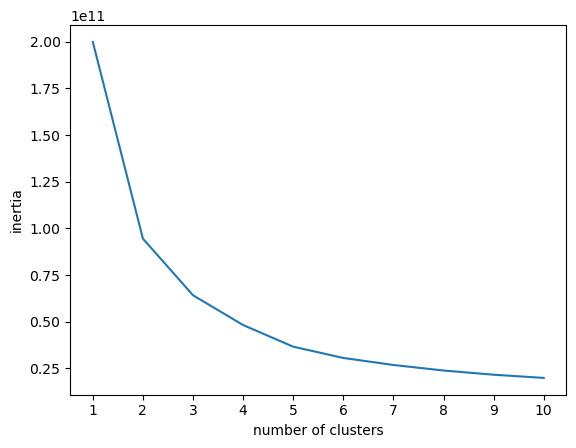

In [36]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

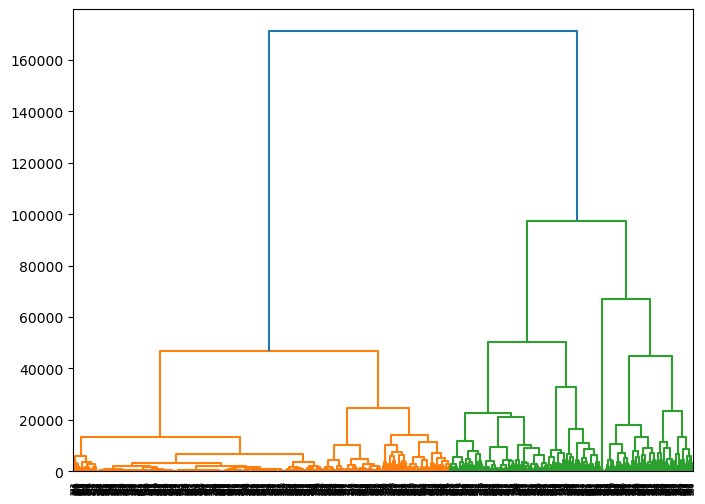

In [37]:
from scipy.cluster import hierarchy
#from sklearn.cluster import AgglomerativeClustering - The option available in sklearn

# Get a random sample, as hierarchical clustering can take a lot of time to run.
df_value_sample = df_value.sample(n = 1000, random_state = 100)

# create clusters using the "ward method"
clusters = hierarchy.linkage(df_value_sample, method="ward")

# create the dendrogram using the hierarchy.dendrogram() method.
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

### Using k = 2

In [39]:
df_value_k2 = df_value.copy()
model_k2 = sk.cluster.KMeans(n_clusters = 2, random_state = 1).fit(df_value_k2)

In [ ]:
df_value_k2["lables"]